In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = 'combine.csv'

df = pd.read_csv(data, sep=';')

## Comparaison 2006 / 2022 départements brulés

In [107]:
df_2006 = df[df['Année']==2006]

In [108]:
surface_totale2006 = df_2006['Surface parcourue (m2)'].sum()

In [109]:
df_grouped = df_2006.groupby('Département').sum('Surface parcourue (m2)').reset_index()

df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False)

df_grouped['Part'] = df_grouped['Surface parcourue (m2)'] / surface_totale2006
df_grouped = df_grouped.head(25)

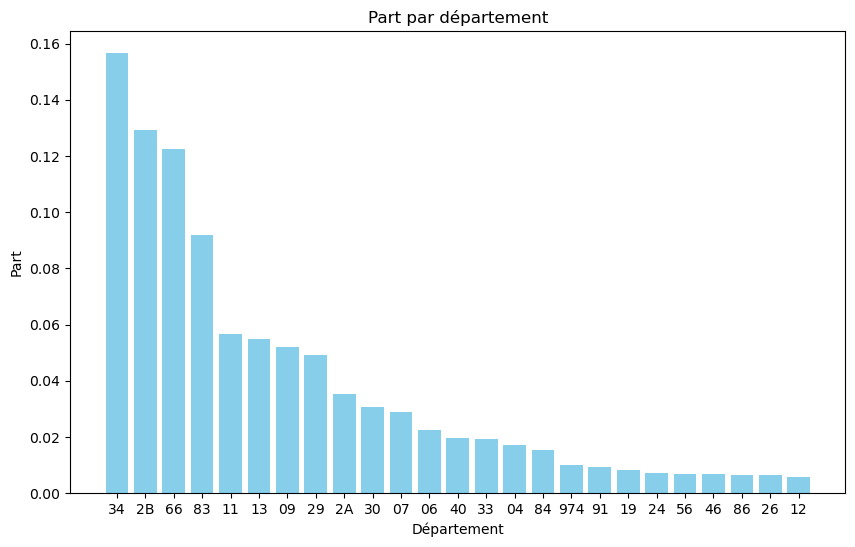

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Département'], df_grouped['Part'], color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Part')
plt.title('Part par département')

# Afficher le diagramme
plt.show()

In [112]:
df_2022 = df[df['Année']==2022]

In [113]:
surface_totale2022 = df_2022['Surface parcourue (m2)'].sum()

In [114]:
df_grouped2 = df_2022.groupby('Département').sum('Surface parcourue (m2)').reset_index()

In [116]:
df_grouped2 = df_grouped2.sort_values(by='Surface parcourue (m2)', ascending=False)

In [ ]:
df_grouped2['Part'] = df_grouped2['Surface parcourue (m2)'] / surface_totale2022
df_grouped2 = df_grouped2.head(25)

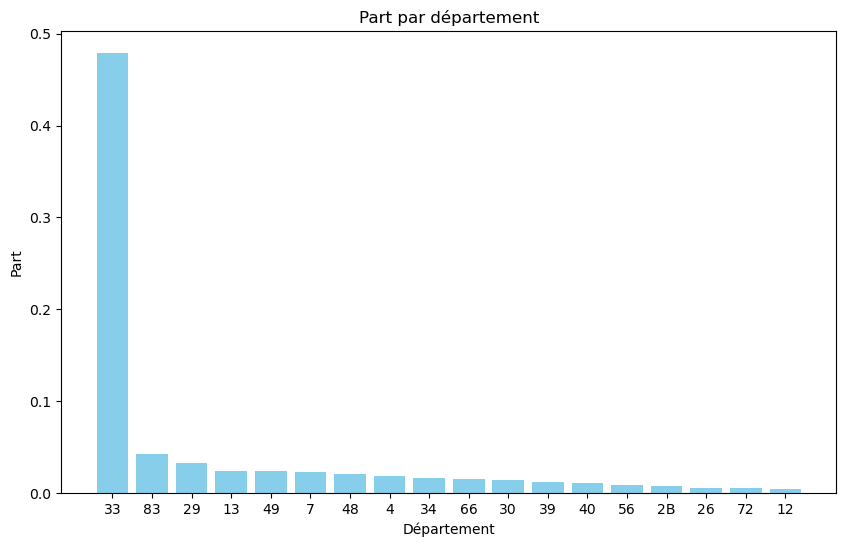

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(df_grouped2['Département'], df_grouped2['Part'], color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Part')
plt.title('Part par département')

# Afficher le diagramme
plt.show()